# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | rongelap
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | qui nhon
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | homer
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | la'ie
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | buka
Processing Record 12 of Set 1 | coxim
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | pennathur
Processing Record 15 of Set 1 | seye
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | muynoq
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | chonchi
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | bardai
Processing Record 22 of Set 1 | grytviken
Processing Record 23 of Set 1 | taiohae
City not fo

Processing Record 41 of Set 4 | kachug
Processing Record 42 of Set 4 | kataragama
City not found. Skipping...
Processing Record 43 of Set 4 | strezhevoy
Processing Record 44 of Set 4 | alexandria
Processing Record 45 of Set 4 | dashtobod
Processing Record 46 of Set 4 | al kharijah
Processing Record 47 of Set 4 | copiapo
Processing Record 48 of Set 4 | ola
Processing Record 49 of Set 4 | mukalla
Processing Record 0 of Set 5 | pelabuhanratu
Processing Record 1 of Set 5 | pretoria
Processing Record 2 of Set 5 | bedong
Processing Record 3 of Set 5 | saint-joseph
Processing Record 4 of Set 5 | lata
Processing Record 5 of Set 5 | zhanaozen
Processing Record 6 of Set 5 | nagqu
Processing Record 7 of Set 5 | nova sintra
Processing Record 8 of Set 5 | bereznik
Processing Record 9 of Set 5 | severo-yeniseyskiy
Processing Record 10 of Set 5 | ambar
Processing Record 11 of Set 5 | luderitz
Processing Record 12 of Set 5 | huetamo de nunez
Processing Record 13 of Set 5 | ouellah
City not found. Skip

Processing Record 30 of Set 8 | tan-tan
Processing Record 31 of Set 8 | amargosa
Processing Record 32 of Set 8 | kapit
Processing Record 33 of Set 8 | divnogorsk
Processing Record 34 of Set 8 | thurso
Processing Record 35 of Set 8 | wakkanai
Processing Record 36 of Set 8 | wanning
Processing Record 37 of Set 8 | vanino
Processing Record 38 of Set 8 | olinda
Processing Record 39 of Set 8 | rantoul
Processing Record 40 of Set 8 | rahimah
Processing Record 41 of Set 8 | thunder bay
Processing Record 42 of Set 8 | pisco
Processing Record 43 of Set 8 | xining
Processing Record 44 of Set 8 | camiri
Processing Record 45 of Set 8 | general levalle
Processing Record 46 of Set 8 | katsuura
Processing Record 47 of Set 8 | iraquara
Processing Record 48 of Set 8 | aldan
Processing Record 49 of Set 8 | aleksandrov gay
Processing Record 0 of Set 9 | kirakira
Processing Record 1 of Set 9 | chilecito
Processing Record 2 of Set 9 | al qusayr
Processing Record 3 of Set 9 | kalur kot
Processing Record 4 o

City not found. Skipping...
Processing Record 22 of Set 12 | pyapon
Processing Record 23 of Set 12 | pacasmayo
Processing Record 24 of Set 12 | coquimbo
Processing Record 25 of Set 12 | soe
Processing Record 26 of Set 12 | nakamura
Processing Record 27 of Set 12 | nieuw amsterdam
Processing Record 28 of Set 12 | togur
Processing Record 29 of Set 12 | mangochi
Processing Record 30 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 31 of Set 12 | ust'-ilimsk
Processing Record 32 of Set 12 | vettur
City not found. Skipping...
Processing Record 33 of Set 12 | doma
Processing Record 34 of Set 12 | quellon
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,21.87,83,0,0.00,US,1689820119
1,rongelap,11.1635,166.8941,28.54,80,100,7.14,MH,1689820119
2,bredasdorp,-34.5322,20.0403,7.60,76,58,0.87,ZA,1689820119
3,qui nhon,13.7667,109.2333,30.85,63,28,0.59,VN,1689820120
4,waitangi,-43.9535,-176.5597,12.12,86,100,3.13,NZ,1689820120


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,21.87,83,0,0.00,US,1689820119
1,rongelap,11.1635,166.8941,28.54,80,100,7.14,MH,1689820119
2,bredasdorp,-34.5322,20.0403,7.60,76,58,0.87,ZA,1689820119
3,qui nhon,13.7667,109.2333,30.85,63,28,0.59,VN,1689820120
4,waitangi,-43.9535,-176.5597,12.12,86,100,3.13,NZ,1689820120


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

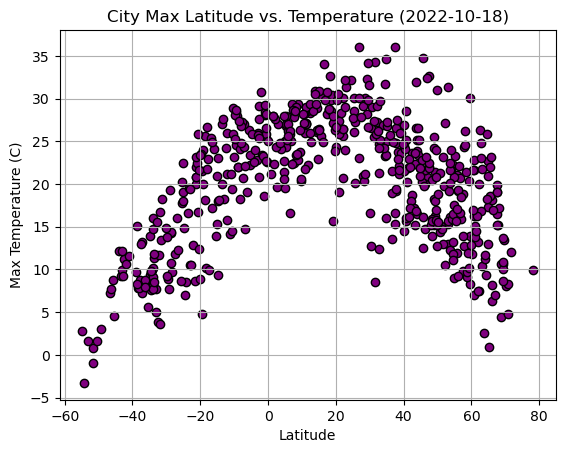

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter( city_data_df["Lat"],city_data_df["Max Temp"], marker="o", facecolors="purple", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

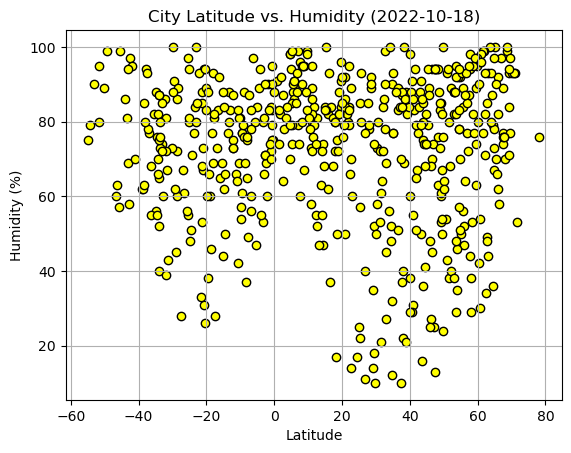

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter( city_data_df["Lat"],city_data_df["Humidity"], marker="o", facecolors="yellow", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

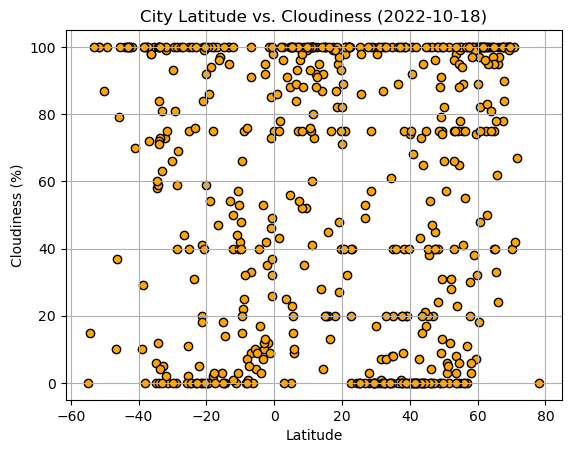

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter( city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", facecolors="orange", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

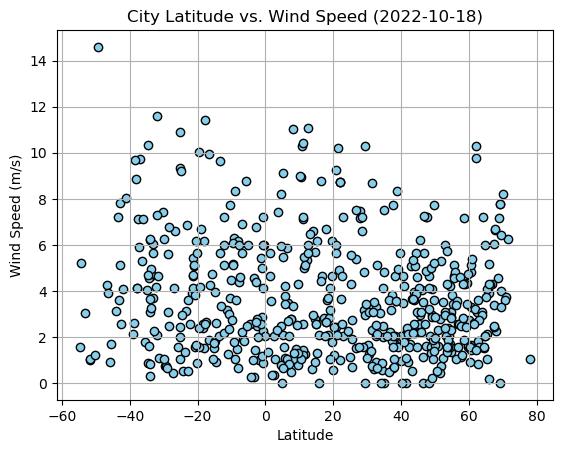

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter( city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", facecolors="skyblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #Get regression values
    regress_values = x_values * slope + intercept
    #create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,coordinates, fontsize=15, color ="red")
    print(f'The r-value is:{rvalue**2}')
   

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,21.87,83,0,0.00,US,1689820119
1,rongelap,11.1635,166.8941,28.54,80,100,7.14,MH,1689820119
3,qui nhon,13.7667,109.2333,30.85,63,28,0.59,VN,1689820120
6,homer,59.6425,-151.5483,13.95,89,100,1.54,US,1689820121
8,la'ie,21.6477,-157.9253,26.26,80,100,4.92,US,1689820121


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,7.60,76,58,0.87,ZA,1689820119
4,waitangi,-43.9535,-176.5597,12.12,86,100,3.13,NZ,1689820120
5,mount gambier,-37.8333,140.7667,8.71,94,100,4.14,AU,1689820118
7,port-aux-francais,-49.3500,70.2167,3.06,99,100,14.60,TF,1689820121
11,coxim,-18.5067,-54.7600,25.60,46,94,2.40,BR,1689820122


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:0.40673891726612754


Text(0, 0.5, 'Max Temperature (C)')

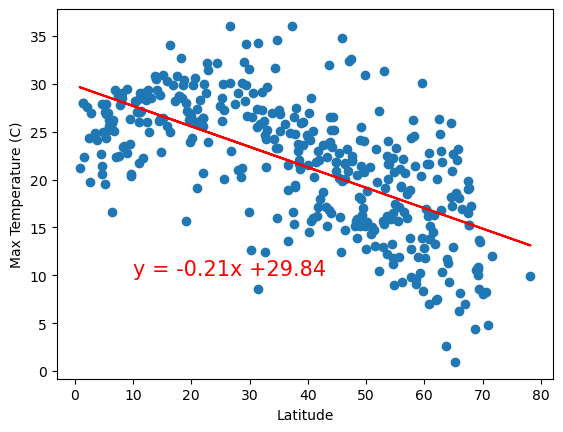

In [26]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, (10,10))

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")



The r-value is:0.6968708414382676


Text(0, 0.5, 'Max Temperature (C)')

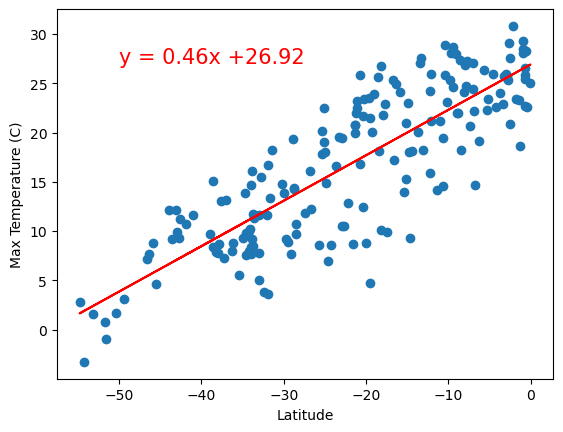

In [27]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, (-50,27))

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


**Discussion about the linear relationship:** In the Northern Hemisphere the plots are linear(have a straight line pattern), however they're negatively associated. Whereas in the Southern Hemisphere, the plots are also linear but are positively associated. In the Northern Hemisphere as the latitude increases the temperature decreases; in the Southern Hemisphere as the latitude increases the temperature increases as well. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.0014137389904002383


Text(0, 0.5, 'Humidity')

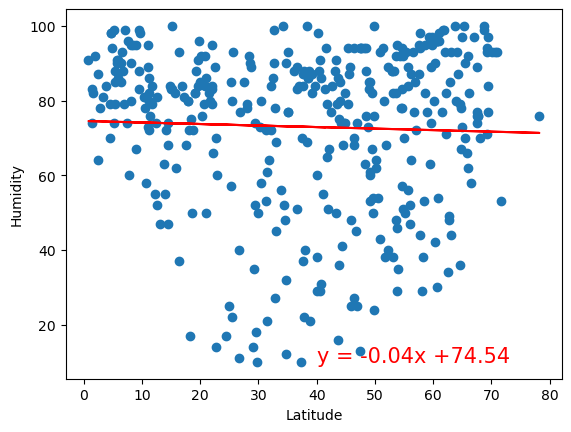

In [28]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, (40,10))

plt.xlabel("Latitude")
plt.ylabel("Humidity")


The r-value is:0.002620206424379242


Text(0, 0.5, 'Humidity')

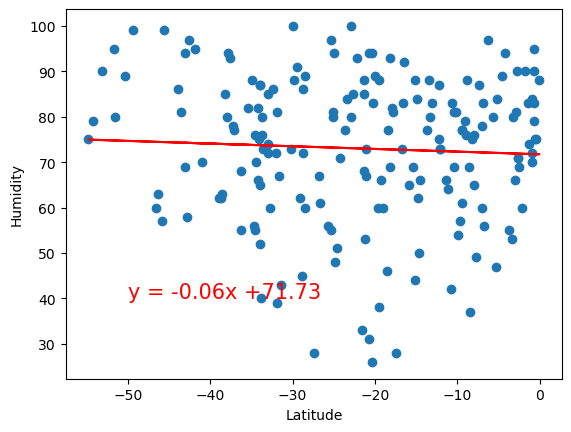

In [30]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, (-50,40))

plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** Latitude vs Humidity in both the Northern and Southern Hemisphere's does not seem to have any linear relations. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.0002997100964422249


Text(0, 0.5, 'Cloudiness')

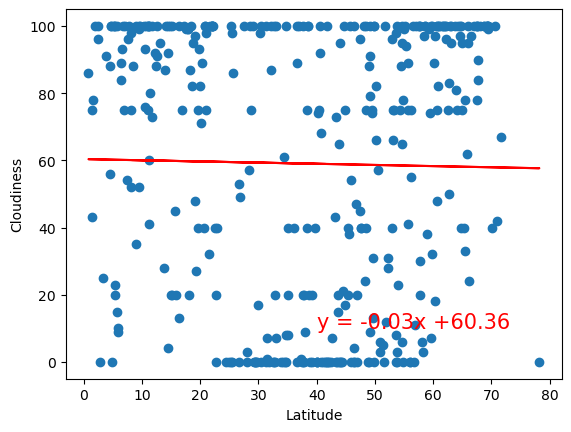

In [31]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, (40,10))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value is:0.072995078062378


Text(0, 0.5, 'Cloudiness')

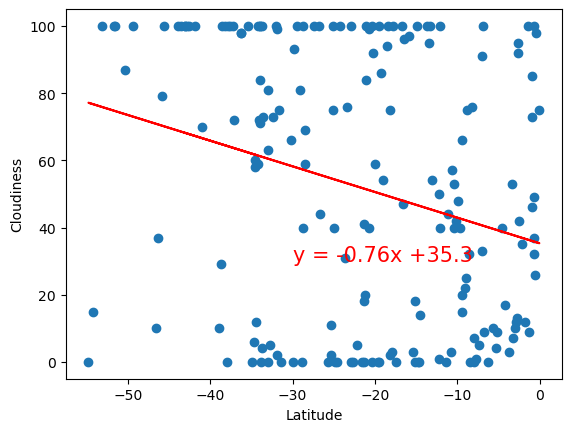

In [32]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, (-30,30))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:**  Latitude vs Cloudiness in both the Northern and Southern Hemisphere's does not seem to have any linear relations.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.0033145166122097104


Text(0, 0.5, 'Wind Speed')

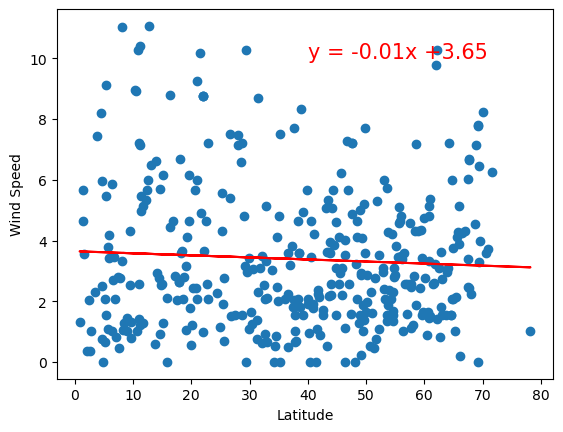

In [34]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, (40,10))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value is:0.01086287011631425


Text(0, 0.5, 'Wind Speed')

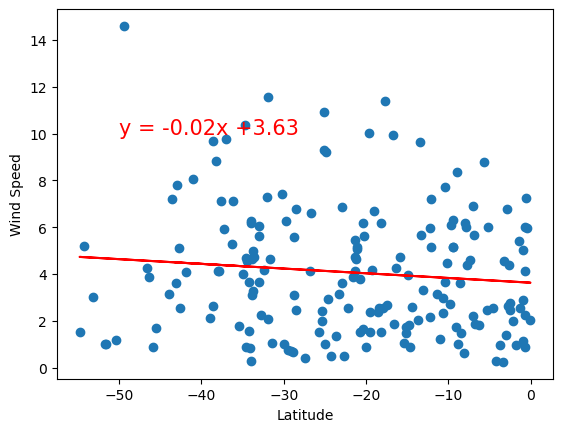

In [35]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, (-50,10))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** Latitude vs Wind Speed in both the Northern and Southern Hemisphere's does not seem to have any linear relations.